## 🏆 Vision Language Models

### 📌 What’s This Challenge All About?
In this challenge, you will interact with pre-trained Vision-Language Models (VLMs) and explore how they perform on tasks (Visual Question Answering, OCR, etc.) that combine visual and textual inputs.  
You’ll observe model behavior, analyze outputs, and reflect on how inputs from two modalities are fused to produce meaningful responses.

We encourage you to **test the models with your own images and custom prompts**—feel free to experiment in **different languages**, especially **Darija** and **Arabic**, to better understand the model's multilingual capabilities.

At the end of the challenge, feel free to **share your observations, insights, and feedback** with the mentors.

But first… 👀✨

Let’s take a quick look at what Vision-Language Models actually are. 👀

### 📌 What are Vision Language Models & How do they work?

Vision language models are multimodal AI systems built by combining a large language model (LLM) with a vision encoder, giving the LLM the ability to **“see.”**

Most VLMs follow an architecture with three parts (as show in the image below):

- A vision encoder is a transformer architecture that has been trained on millions of image-text pairs, giving it the ability to associate images and text.
- A projector is a set of layers that translates the output of the vision encoder into a form the LLM can understand, often interpreted as image tokens.
- An LLM, which can be any LLM that has already been trained and released.

<p align="center" >
  <img src="https://www.nvidia.com/en-us/glossary/vision-language-models/_jcr_content/root/responsivegrid/nv_container_copy_co_300503066/nv_image.coreimg.svg/1736168815674/vlm-architecture-diagram.svg" width="500" title="VLM Components"/>
</p>

### 📌 What Are the Capabilities of Vision-Language Models?
VLM can perform various tasks such as chatting about images, image recognition via instructions, visual question answering, document understanding, and more — some of which we'll explore in this challenge.
The image below showcases the different tasks a VLM can perform.


<p align="center" >
  <img src="https://cdn-lfs.hf.co/datasets/huggingface/documentation-images/12381f8ddbdf7d95650961bc66682ed051b8c53ac79359d9245be75c21175c3d?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27visual.jpg%3B+filename%3D%22visual.jpg%22%3B&response-content-type=image%2Fjpeg&Expires=1747766792&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0Nzc2Njc5Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9kYXRhc2V0cy9odWdnaW5nZmFjZS9kb2N1bWVudGF0aW9uLWltYWdlcy8xMjM4MWY4ZGRiZGY3ZDk1NjUwOTYxYmM2NjY4MmVkMDUxYjhjNTNhYzc5MzU5ZDkyNDViZTc1YzIxMTc1YzNkP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=T8GDCAS1I-GLTKu0NqYPQ%7E3LbAu5Hwu1j5vMtdj323p%7EODNp81EX8MeGejOnXTWTOZK8FB%7ENhpBkhyYdzu0pRs2XDlV%7E2TJ3Y%7E9ru2tOeSq6-AXt8XOePXdb25JwH2E5WjwQ3gLhIUbrOoKurGH8EbAxwKXo6g3Gj3Zoael1Lja379z-ptKOWPnDOIU0IcmYhnHtCSpZSAglmgFNndQKyyk8HDB4JSBo0GNe3qCtKrZdZyTvXEncKs3lyAxnTr-1R7m4Tn8CzU-FCXvC2BmfrG%7EzMGLjYJP63qXe6pJYDYrc35JQgSaIT6eEfjdgkvrxa3c0Oomh3NYRP-1rf5jcig__&Key-Pair-Id=K3RPWS32NSSJCE" width="700" title="VLM Components"/>
</p>

Alright, enough talk — let’s mess around with these VLMs and see what they do! 🤖🎉

## Environment setup

In [ ]:
!pip install transformers -q

In [ ]:
# After you finish testing each VLM, we will use the following function to free up GPU memory and remove variables from the global scope
import gc
import time


def clear_memory():
    # Delete variables if they exist in the current global scope
    if "inputs" in globals():
        del globals()["inputs"]
    if "model" in globals():
        del globals()["model"]
    if "processor" in globals():
        del globals()["processor"]
    time.sleep(2)

    # Garbage collection and clearing CUDA memory
    gc.collect()
    time.sleep(2)
    torch.cuda.empty_cache()
    torch.cuda.synchronize()
    time.sleep(2)
    gc.collect()
    time.sleep(2)

    print(f"GPU allocated memory: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"GPU reserved memory: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")

## 1. Visual Question Answering
Objective: Answer specific questions posed about an image/video.

Input: An image/video coupled with a natural language question.

Output: A concise answer in natural language.

We're going to use `Qwen2-VL-2B-Instruct` for this task. (Feel free to try other models as well.)

In [ ]:
from PIL import Image
import requests
import torch
from torchvision import io
from typing import Dict
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor

# First, let's load the model and its processor on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

#### Let's test with images

The image shows a meal consisting of a tagine, a traditional dish from Morocco. The tagine is filled
with a variety of vegetables, including carrots, zucchini, and possibly other vegetables. The dish
is served in a clay pot, which is a common cooking vessel in many Middle Eastern cuisines. The
tagine is placed on a white plate with a colorful place mat. In the background, there are small
bowls containing olives and bread, suggesting that this meal is part of a larger dining experience.


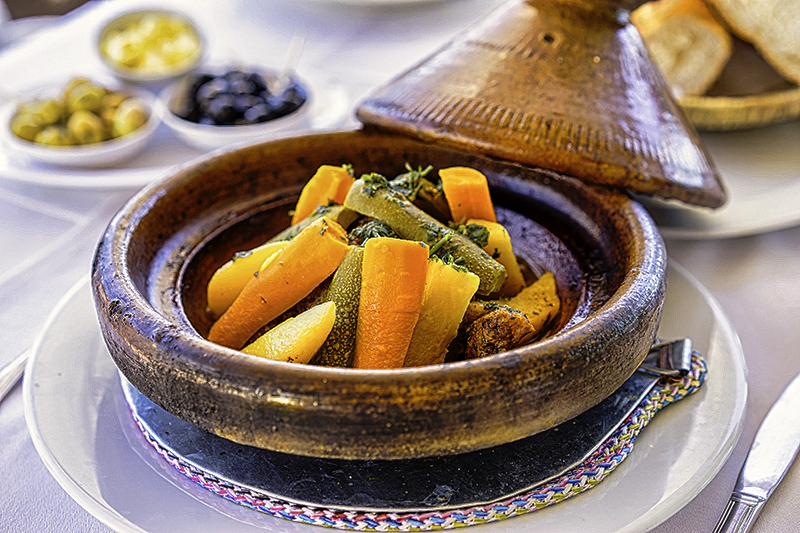

In [ ]:
# Image (Try other images)
url = "https://legarconboucher.com/img/cms/Recette/tajine-maroc.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Prompt (Try with other questions; Darija maybe?)
text_query = "What do you see in the image?"

# Define model chat template
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {"type": "text", "text": text_query},
        ],
    }
]


# Preprocess the inputs
text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
# Excepted output: '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>Describe this image.<|im_end|>\n<|im_start|>assistant\n'

inputs = processor(
    text=[text_prompt], images=[image], padding=True, return_tensors="pt"
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
output_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids = [
    output_ids[len(input_ids) :]
    for input_ids, output_ids in zip(inputs.input_ids, output_ids)
]
output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)

import textwrap
print(textwrap.fill(output_text[0], width=100))

image

#### Let's test with videos

In [ ]:
!pip install pyav yt-dlp qwen-vl-utils

In [ ]:
def download_video(video_url: str):
  import yt_dlp

  download_folder = "/content/"

  ydl_opts = {
      'outtmpl': f'{download_folder}/video.mp4',
      'format': 'best',
  }

  with yt_dlp.YoutubeDL(ydl_opts) as ydl:
      ydl.download([video_url])

In [ ]:
download_video("https://www.youtube.com/shorts/po8D2FUCtu0")

[youtube] Extracting URL: https://www.youtube.com/shorts/po8D2FUCtu0
[youtube] po8D2FUCtu0: Downloading webpage
[youtube] po8D2FUCtu0: Downloading tv client config
[youtube] po8D2FUCtu0: Downloading tv player API JSON
[youtube] po8D2FUCtu0: Downloading ios player API JSON
[youtube] po8D2FUCtu0: Downloading m3u8 information
[info] po8D2FUCtu0: Downloading 1 format(s): 18
[download] Destination: /content//video.mp4
[download] 100% of  622.56KiB in 00:00:00 at 2.03MiB/s   


In [ ]:
from qwen_vl_utils import process_vision_info


# Video
video = "/content/video.mp4"
text_query = "What do you see in the video?"

# Messages containing a video and a text query
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "video",
                "video": video,
                "max_pixels": 360 * 420,
                "fps": 1.0,
            },
            {"type": "text", "text": text_query},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
output_text[0]


qwen-vl-utils using torchvision to read video.


'In the video, a man is holding a bucket filled with blue liquid. He talks to the camera and then shows the liquid to the camera.'

In [ ]:
# Ensure that you have finished testing the VLM before calling this function.
clear_memory()

GPU allocated memory: 0.01 GB
GPU reserved memory: 4.55 GB


## 2. Image Captioning

Objective: Generate a descriptive sentence that encapsulates the overall content of an image.

Input: An image.

Output: A natural language sentence describing the image.

The difference between VQA and image captioning is that VQA involves answering specific questions about an image based on its content, while image captioning generates a general description of the entire image without any specific query.

We're going to use `blip-image-captioning-base` for this task. (Feel free to try other models as well.)

In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# First, let's load the model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to("cuda")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning (generates a caption based on an additional condition or query that guides the captioning process)
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print("Conditional image captioning: ", processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning (generates a caption for an image without any specific context other than the image itself.)
inputs = processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print("unconditional image captioning: ", processor.decode(out[0], skip_special_tokens=True))

raw_image

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
clear_memory()

GPU allocated memory: 0.01 GB
GPU reserved memory: 4.55 GB


## 3. OCR (Optical Character Recognition)
Objective: Extract textual information from images, encompassing printed, handwritten, or scene text, and convert it into machine-readable formats.

Input: Scanned documents, or any visuals containing text coupled with an optional prompt to guide the model's focus, such as "Extract the invoice number" or "What is the expiration date on the ID card?"

Ouptut: Machine-readable text transcribed from the image.

We're going to use `Qwen2-VL-OCR-2B-Instruct` for this task. (Feel free to try other models as well.)

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# First, let's load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "prithivMLmods/Qwen2-VL-OCR-2B-Instruct", torch_dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_pretrained("prithivMLmods/Qwen2-VL-OCR-2B-Instruct")

The name of the invoice's sender is Ted's Small
Business.<|im_end|>


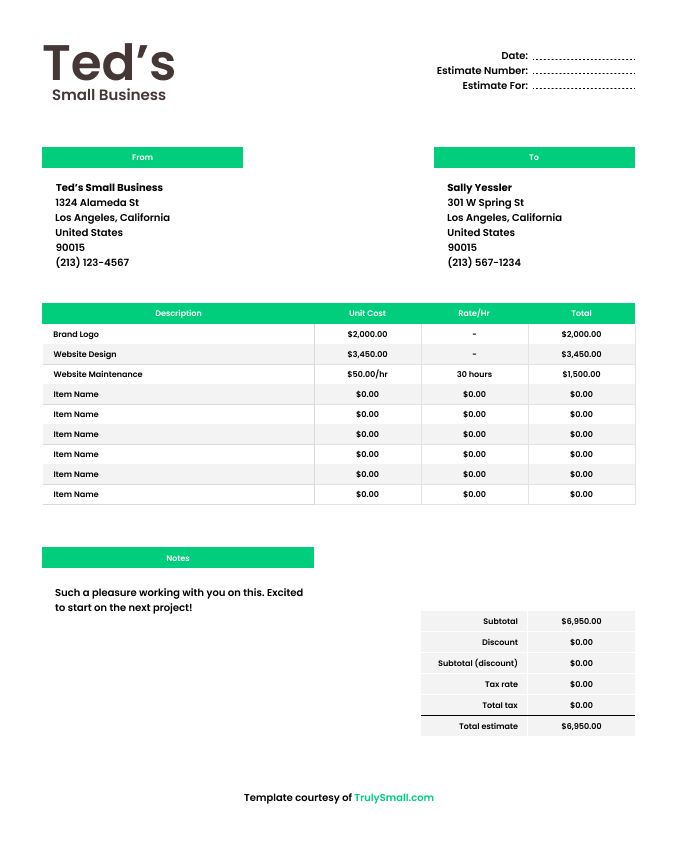

In [ ]:
# Image
url = "https://trulysmall.com/wp-content/uploads/2023/04/Simple-Invoice-Template.png"
image = Image.open(requests.get(url, stream=True).raw)

text_query = "What is the name of the invoice' sender?"

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": image,
            },
            {"type": "text", "text": text_query},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

import textwrap
print(textwrap.fill(output_text[0], width=50))

image

In [ ]:
clear_memory()

GPU allocated memory: 0.01 GB
GPU reserved memory: 4.55 GB


## Visual Grounding
Objective: Identify and localize specific regions or objects within an image that correspond to a given natural language query.

Input: An image or video containing various objects or scenes and an instruction referring to a specific object or region within the image/video.

Outputs:
- Bounding Box: Coordinates (typically in the form of [x_min, y_min, x_max, y_max]) that define the rectangular area enclosing the object or region identified by the query.
or
- Segmentation Mask : A pixel-wise mask delineating the exact shape of the identified object or region.
or
- Object Label : A classification label indicating the type of object identified (e.g., "cat," "car," "tree").


We're going to use `microsoft/kosmos-2-patch14-224` for this task. (Feel free to try other models as well.)

In [ ]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq

# First, let's load the model and its processor
model = AutoModelForVision2Seq.from_pretrained("microsoft/kosmos-2-patch14-224", device_map="auto")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")

In [ ]:
# let's define a function to run a prompt.

def run_example(prompt, image):

    inputs = processor(text=prompt, images=image, return_tensors="pt")
    inputs = inputs.to("cuda")
    generated_ids = model.generate(
      pixel_values=inputs["pixel_values"],
      input_ids=inputs["input_ids"],
      attention_mask=inputs["attention_mask"],
      image_embeds=None,
      image_embeds_position_mask=inputs["image_embeds_position_mask"],
      use_cache=True,
      max_new_tokens=128,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    _processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)
    processed_text, entities = processor.post_process_generation(generated_text)

    return processed_text, entities

In [ ]:
# Let's define a function to draw the bounding boxes returned by the VLM.
# REMARK >> (IT'S A QUITE LONG FUNCTION NO NEED TO UNDERSTAND EVERY DETAIL, Haha!)

import cv2
import numpy as np
import os
import requests
import torch
import torchvision.transforms as T

from PIL import Image


def is_overlapping(rect1, rect2):
    x1, y1, x2, y2 = rect1
    x3, y3, x4, y4 = rect2
    return not (x2 < x3 or x1 > x4 or y2 < y3 or y1 > y4)


def draw_entity_boxes_on_image(image, entities, save_path=None):
    """_summary_
    Args:
        image (_type_): image or image path
        collect_entity_location (_type_): _description_
    """
    if isinstance(image, Image.Image):
        image_h = image.height
        image_w = image.width
        image = np.array(image)[:, :, [2, 1, 0]]
    elif isinstance(image, str):
        if os.path.exists(image):
            pil_img = Image.open(image).convert("RGB")
            image = np.array(pil_img)[:, :, [2, 1, 0]]
            image_h = pil_img.height
            image_w = pil_img.width
        else:
            raise ValueError(f"invaild image path, {image}")
    elif isinstance(image, torch.Tensor):
        image_tensor = image.cpu()
        reverse_norm_mean = torch.tensor([0.48145466, 0.4578275, 0.40821073])[:, None, None]
        reverse_norm_std = torch.tensor([0.26862954, 0.26130258, 0.27577711])[:, None, None]
        image_tensor = image_tensor * reverse_norm_std + reverse_norm_mean
        pil_img = T.ToPILImage()(image_tensor)
        image_h = pil_img.height
        image_w = pil_img.width
        image = np.array(pil_img)[:, :, [2, 1, 0]]
    else:
        raise ValueError(f"invaild image format, {type(image)} for {image}")

    if len(entities) == 0:
        return image

    new_image = image.copy()
    previous_bboxes = []
    # size of text
    text_size = 1
    # thickness of text
    text_line = 1  # int(max(1 * min(image_h, image_w) / 512, 1))
    box_line = 3
    (c_width, text_height), _ = cv2.getTextSize("F", cv2.FONT_HERSHEY_COMPLEX, text_size, text_line)
    base_height = int(text_height * 0.675)
    text_offset_original = text_height - base_height
    text_spaces = 3

    for entity_name, (start, end), bboxes in entities:
        for (x1_norm, y1_norm, x2_norm, y2_norm) in bboxes:
            orig_x1, orig_y1, orig_x2, orig_y2 = int(x1_norm * image_w), int(y1_norm * image_h), int(x2_norm * image_w), int(y2_norm * image_h)
            # draw bbox
            # random color
            color = tuple(np.random.randint(0, 255, size=3).tolist())
            new_image = cv2.rectangle(new_image, (orig_x1, orig_y1), (orig_x2, orig_y2), color, box_line)

            l_o, r_o = box_line // 2 + box_line % 2, box_line // 2 + box_line % 2 + 1

            x1 = orig_x1 - l_o
            y1 = orig_y1 - l_o

            if y1 < text_height + text_offset_original + 2 * text_spaces:
                y1 = orig_y1 + r_o + text_height + text_offset_original + 2 * text_spaces
                x1 = orig_x1 + r_o

            # add text background
            (text_width, text_height), _ = cv2.getTextSize(f"  {entity_name}", cv2.FONT_HERSHEY_COMPLEX, text_size, text_line)
            text_bg_x1, text_bg_y1, text_bg_x2, text_bg_y2 = x1, y1 - (text_height + text_offset_original + 2 * text_spaces), x1 + text_width, y1

            for prev_bbox in previous_bboxes:
                while is_overlapping((text_bg_x1, text_bg_y1, text_bg_x2, text_bg_y2), prev_bbox):
                    text_bg_y1 += (text_height + text_offset_original + 2 * text_spaces)
                    text_bg_y2 += (text_height + text_offset_original + 2 * text_spaces)
                    y1 += (text_height + text_offset_original + 2 * text_spaces)

                    if text_bg_y2 >= image_h:
                        text_bg_y1 = max(0, image_h - (text_height + text_offset_original + 2 * text_spaces))
                        text_bg_y2 = image_h
                        y1 = image_h
                        break

            alpha = 0.5
            for i in range(text_bg_y1, text_bg_y2):
                for j in range(text_bg_x1, text_bg_x2):
                    if i < image_h and j < image_w:
                        if j < text_bg_x1 + 1.35 * c_width:
                            # original color
                            bg_color = color
                        else:
                            # white
                            bg_color = [255, 255, 255]
                        new_image[i, j] = (alpha * new_image[i, j] + (1 - alpha) * np.array(bg_color)).astype(np.uint8)

            cv2.putText(
                new_image, f"  {entity_name}", (x1, y1 - text_offset_original - 1 * text_spaces), cv2.FONT_HERSHEY_COMPLEX, text_size, (0, 0, 0), text_line, cv2.LINE_AA
            )
            # previous_locations.append((x1, y1))
            previous_bboxes.append((text_bg_x1, text_bg_y1, text_bg_x2, text_bg_y2))

    pil_image = Image.fromarray(new_image[:, :, [2, 1, 0]])
    if save_path:
        pil_image.save(save_path)

    return pil_image # new_image

In [ ]:
# Test with other images

# url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.png"
url = "https://cdn.nba.com/manage/2021/12/USATSI_15452777-scaled-e1639236310885-784x462.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
# Define the prompt and call the model

prompt = "<grounding> Describe this image in detail:"
model_output, entities = run_example(prompt, image)

Describe this image in detail: Two basketball players are on the court, with one of them holding a basketball and the other one trying to block him. They are both wearing blue uniforms.
[('Two basketball players', (31, 53), [(0.078125, 0.046875, 0.671875, 0.984375), (0.515625, 0.046875, 0.921875, 0.984375)]), ('the court', (61, 70), [(0.015625, 0.015625, 0.984375, 0.984375)]), ('a basketball', (97, 109), [(0.640625, 0.734375, 0.765625, 0.921875)]), ('blue uniforms', (171, 184), [(0.109375, 0.203125, 0.421875, 0.703125), (0.515625, 0.203125, 0.921875, 0.984375)])]


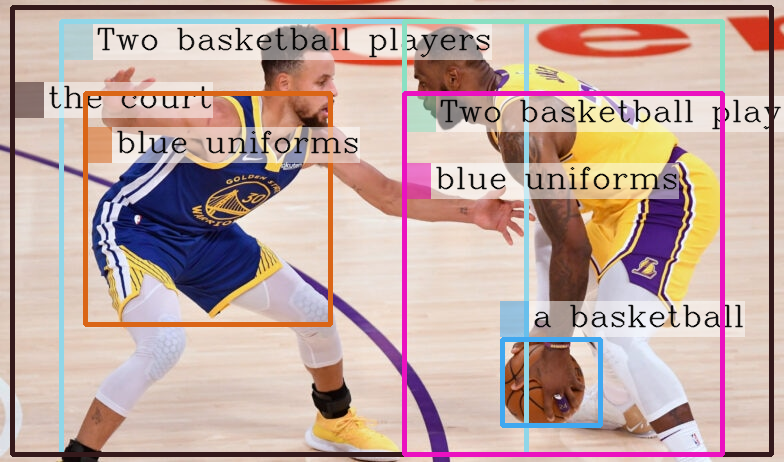

In [ ]:
# Draw the bounding boxes on the image and print the model output
new_image = draw_entity_boxes_on_image(image, entities)
print(model_output, entities, sep="\n")
new_image

## 🎉 Congratulations!

You've reached the end of the notebook—great job! 👏  
We hope this hands-on experience gave you a better understanding of how Vision-Language Models (VLMs) work.

If you have any questions or want to share your results, don’t hesitate to reach out.


## 🤔 What’s Next?

As you wrap up, take a moment to reflect:

- **What VLM tasks impressed you the most?** answering questions, Captioning, grounding, …?
- **If you were to fine-tune a VLM**, what task would you pick? What data would you need?
- **What real-world problem could you solve** by combining vision and language?


**Good luck with the rest of the challenge—and HAVE FUN! 🚀**